# Nanodegree Engenheiro de Machine Learning
## Aprendizagem Não Supervisionada
## Projeto 3: Criando Segmentos de Clientela

Bem-vindo ao terceiro projeto do Nanodegree Engenheiro de Machine Learning! Neste Notebook, alguns modelos de código já foram fornecidos e será seu trabalho implementar funcionalidades adicionais necessárias para completar seu projeto com êxito. Seções que começam com **'Implementação'** no cabeçalho indicam que os blocos de código seguintes vão precisar de funcionalidades adicionais que você deve fornecer. As instruções serão fornecidas para cada seção e as especificações da implementação são marcados no bloco de código com um `'TODO'`. Leia as instruções atentamente!

Além de implementar códigos, há perguntas que você deve responder relacionadas ao projeto e a sua implementação. Cada seção na qual você responderá uma questão está precedida de um cabeçalho **'Questão X'**. Leia atentamente cada questão e forneça respostas completas nos boxes seguintes que começam com **'Resposta:'**. O envio do seu projeto será avaliado baseado nas suas respostas para cada uma das questões e na implementação que você forneceu.  

>**Nota:** Células de código e Markdown podem ser executadas utilizando o atalho do teclado **Shift+Enter**. Além disso, células de Markdown podem ser editadas ao dar duplo clique na célula para entrar no modo de edição.

## Começando

Neste projeto, você irá analisar o conjunto de dados de montantes de despesas anuais de vários clientes (reportados em *unidades monetárias*) de diversas categorias de produtos para estrutura interna. Um objetivo deste projeto é melhor descrever a variação de diferentes tipos de clientes que um distribuidor de atacado interage. Isso dará ao distribuidor discernimento sobre como melhor estruturar seu serviço de entrega de acordo com as necessidades de cada cliente.

O conjunto de dados deste projeto pode ser encontrado no [Repositório de Machine Learning da UCI](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). Para efeitos de projeto, os atributos `'Channel'` e `'Region'` serão excluídos da análise – que focará então nas seis categorias de produtos registrados para clientes.

Execute o bloco de código abaixo para carregar o conjunto de dados de clientes da distribuidora, junto com algumas das bibliotecas de Python necessárias exigidos para este projeto. Você saberá que o conjunto de dados carregou com êxito se o tamanho do conjunto de dados for reportado.

In [1]:
# Importe as bibliotecas necessárias para este projeto
import numpy as np
import pandas as pd
from IPython.display import display # Permite o uso de display() para DataFrames
import matplotlib.pyplot as plt

# Importe o código sumplementar para visualização de visuals.py
import visuals as vs

# Mostre matplotlib no corpo do texto (bem formatado no Notebook)
%matplotlib inline

# Carregue o conjunto de dados dos clientes da distribuidora de atacado
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Explorando os Dados
Nesta seção, você vai começar a explorar os dados através de visualizações e códigos para entender como cada atributo é relacionado a outros. Você vai observar descrições estatísticas do conjunto de dados, considerando a relevância de cada atributo, e selecionando alguns exemplos de pontos de dados do conjunto de dados que você vai seguir no decorrer do curso deste projeto.

Execute o bloco de código abaixo para observar as descrições estatísticas sobre o conjunto de dados. Note que o conjunto é compostos de seis categorias importantes de produtos: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'** e **'Delicatessen'** (Perecíveis, Lacticínios, Secos e Molhados, Congelados, Limpeza/Higiene, Padaria/Frios). Considere o que cada categoria representa em termos os produtos que você poderia comprar.

In [2]:
# Mostre a descrição do conjunto de dados
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementação: Selecionando Amostras
Para melhor compreensão da clientela e como seus dados vão se transformar no decorrer da análise, é melhor selecionar algumas amostras de dados de pontos e explorá-los com mais detalhes. No bloco de código abaixo, adicione **três** índices de sua escolha para a lista de `indices` que irá representar os clientes que serão acompanhados. Sugerimos que você tente diferentes conjuntos de amostras até obter clientes que variam significativamente entre si.

In [3]:
# TODO: Selecione três índices de sua escolha que você gostaria de obter como amostra do conjunto de dados
indices = [289,61,218]

# Crie um DataFrame das amostras escolhidas
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,42786,286,471,1388,32,22
1,35942,38369,59598,3254,26701,2017
2,18,7504,15205,1285,4797,6372


### Questão 1
Considere que a compra total de cada categoria de produto e a descrição estatística do conjunto de dados abaixo para a sua amostra de clientes.  
 - Que tipo de estabelecimento (de cliente) cada uma das três amostras que você escolheu representa?

**Dica:** Exemplos de estabelecimentos incluem lugares como mercados, cafés e varejistas, entre outros. Evite utilizar nomes para esses padrões, como dizer *"McDonalds"* ao descrever uma amostra de cliente de restaurante.

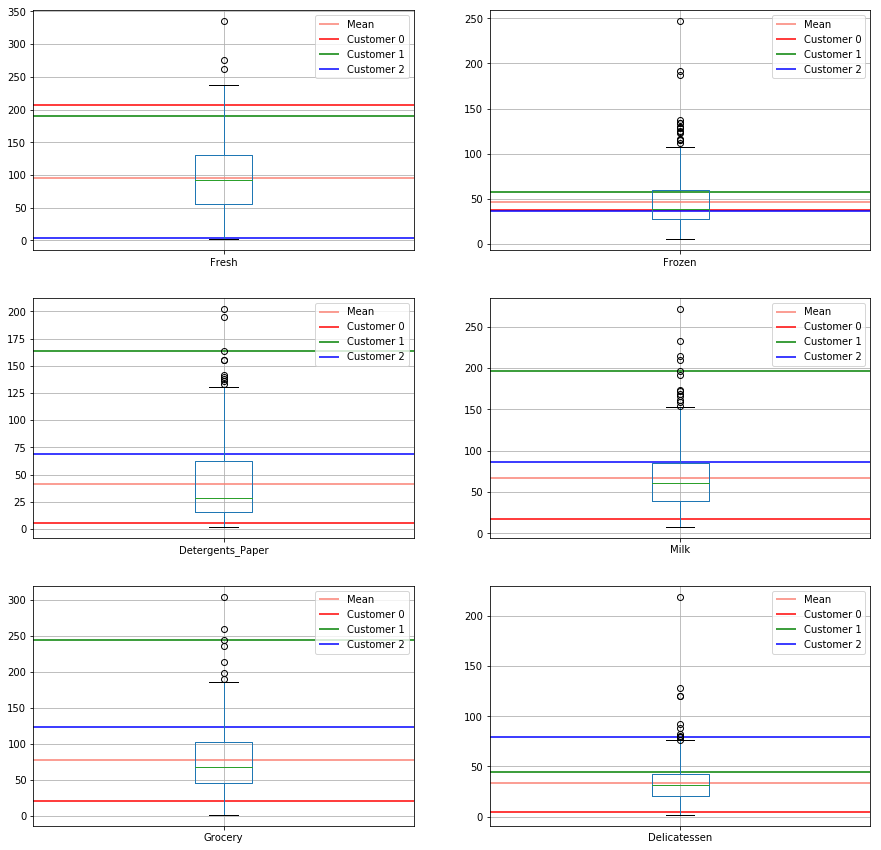

In [4]:
#Criando um boxplot para analisarmos a relação da amostra com os dataset
aux = data.apply(np.sqrt)

fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_figheight(15)
fig.set_figwidth(15)

for ii, col in enumerate(data.columns):
    gp = aux[[col]].boxplot(ax = axes[ii%3,ii%2])
    
    #média
    gp.hlines(aux[[col]].mean(),0,2,colors= ['salmon'], label='Mean')
    
    gp.hlines(aux[[col]].loc[indices[0]],0,2,colors= ['red'], label='Customer 0')
    gp.hlines(aux[[col]].loc[indices[1]],0,2,colors= ['green'], label='Customer 1')
    gp.hlines(aux[[col]].loc[indices[2]],0,2,colors= ['blue'], label='Customer 2')
    
    gp.legend()
    
del aux

**Resposta:** Comparando os 3 clientes podemos fazer as seguintes suposições:

`O boxplot acima mostra a média para cada feature e o valor de cada item da amostra criada anteriormente.`
>Cliente 0: cliente parece ser um restaurante devida a alta demanda por produtos frescos e congelados e a pequena quantidade de             produtos de higiene e frios. O consumo de produtos **FRESH** está muito acima da média e do 3º quartil. Os demais segmentos analisados para o customer apresentam baixos valores de consumo.
            

>Cliente 1: cliente parece ser um mercado que vende todos os tipos de produtos. Podemos ver no gráfico acima que o consumo deste cliente está sempre acima da média e se comporta como um **outlier** em vários segmentos de produtos.

>Cliente 2: cliente parece ser um mercado, mas de porte menor e focado em itens mais básicos, algo semelhante ao uma mercearia. Pelo gráfico acima vemos que a representatividade de produtos **FRESH** para esse cliente é baixa, ficando próxima ao menor valor registrado no dataset e muito abaixo do 1º quartil e da média. Para os demais itens, exceto para itens **FROZEN** apresenta valores de consumo acima do 3º quartil e se comporta como **outlier** para `Delicatessen`.

### Implementação: Relevância do Atributo
Um pensamento interessante a se considerar é se um (ou mais) das seis categorias de produto são na verdade relevantes para entender a compra do cliente. Dito isso, é possível determinar se o cliente que comprou certa quantidade de uma categoria de produto vai necessariamente comprar outra quantidade proporcional de outra categoria de produtos? Nós podemos determinar facilmente ao treinar uma aprendizagem não supervisionada de regressão em um conjunto de dados com um atributo removido e então pontuar quão bem o modelo pode prever o atributo removido.

No bloco de código abaixo, você precisará implementar o seguinte:
 - Atribuir `new_data` a uma cópia dos dados ao remover o atributo da sua escolha utilizando a função `DataFrame.drop`.
 - Utilizar `sklearn.cross_validation.train_test_split` para dividir o conjunto de dados em conjuntos de treinamento e teste.
   - Utilizar o atributo removido como seu rótulo alvo. Estabelecer um `test_size` de `0.25` e estebeleça um `random_state`.
 - Importar uma árvore de decisão regressora, estabelecer um `random_state` e ajustar o aprendiz nos dados de treinamento.
 - Reportar a pontuação da previsão do conjunto de teste utilizando a função regressora `score`.

In [5]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor

# TODO: Fazer uma cópia do DataFrame utilizando a função 'drop' para soltar o atributo dado
atributo_retirado = 'Milk'
new_data = data.drop(atributo_retirado, axis=1)

# TODO: Dividir os dados em conjuntos de treinamento e teste utilizando o atributo dado como o alvo
X_train, X_test, y_train, y_test = train_test_split(new_data, data[atributo_retirado],test_size=0.25, random_state = 42)

# TODO: Criar um árvore de decisão regressora e ajustá-la ao conjunto de treinamento

regressor = DecisionTreeRegressor(random_state=42).fit(X_train, y_train)

# TODO: Reportar a pontuação da previsão utilizando o conjunto de teste
score = regressor.score(X_test, y_test)

C:\Users\ft1fe\Miniconda3\envs\py27\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
score

0.15627539501732116

### Questão 2
- Qual atributo você tentou prever?
- Qual foi a pontuação da previsão reportada?
- Esse atributo é necessário para identificar os hábitos de compra dos clientes?

**Dica:** O coeficiente de determinação, `R^2`, é pontuado entre 0 e 1, sendo 1 o ajuste perfeito. Um `R^2` negativo indica que o modelo falhou em ajustar os dados. Se você obter um score baixo para um atributo em particular, isso nos faz acreditar que aquele ponto de atributo é difícil de ser previsto utilizando outros atributos, sendo assim um atributo importante quando considerarmos a relevância.

**Resposta:**
- Qual atributo você tentou prever?
> Milk
- Qual foi a pontuação da previsão reportada?
> 0.15627539501732116
- Esse atributo é necessário para identificar os hábitos de compra dos clientes?
> Sim, a feature retirada não pode ser prevista com boa assertividade pelas demais variáveis o que mostra certa indepência das outras features e portanto é uma informação importante das características dos clientes.

### Visualizando a Distribuição de Atributos
Para entender melhor o conjunto de dados, você pode construir uma matriz de dispersão de cada um dos seis atributos dos produtos presentes nos dados. Se você perceber que o atributo que você tentou prever acima é relevante para identificar um cliente específico, então a matriz de dispersão abaixo pode não mostrar nenhuma relação entre o atributo e os outros. Da mesma forma, se você acredita que o atributo não é relevante para identificar um cliente específico, a matriz de dispersão pode mostrar uma relação entre aquele e outros atributos dos dados. Execute o bloco de código abaixo para produzir uma matriz de dispersão.

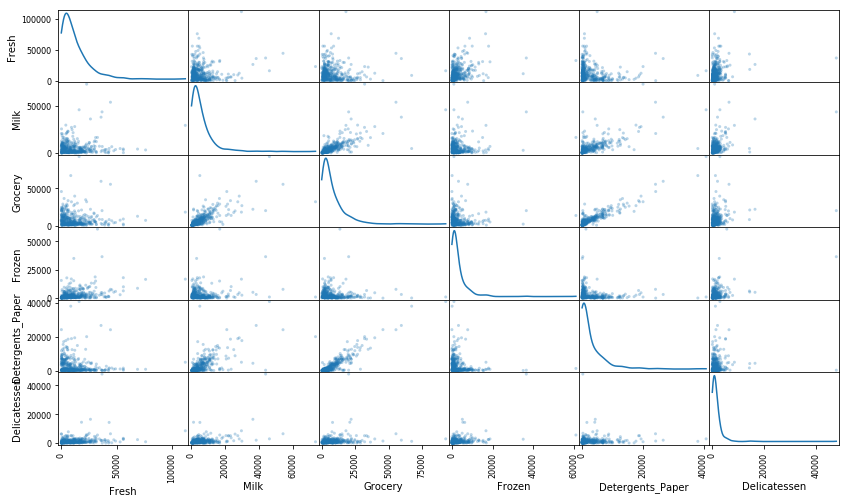

In [7]:
# Produza uma matriz de dispersão para cada um dos pares de atributos dos dados
pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

In [8]:
data.corr()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicatessen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


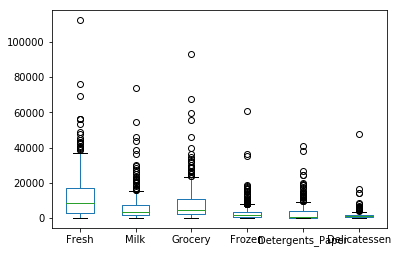

In [9]:
_ = data.plot.box()

In [10]:
data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


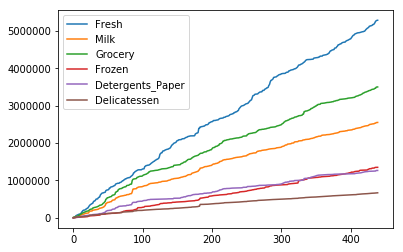

In [11]:
_ = data.cumsum().plot()

### Questão 3:

- Usando a matriz de dispersão como referência, discuta a distribuição da base de dados. Elabore sua resposta considerando a normalidade, _outliers_, a grande quantidade de pontos próximo de 0 e outras coisas que julgar importante. Se necessário, você pode realizar outros plots para complementar sua explicação.
- Há algum par de atributos que mostra algum grau de correlação?
- Como isso confirma ou nega a suspeita sobre relevância do atributo que você tentou prever?
- Como os dados desses atributos são distribuidos?

**Dica:** Os dados são distribuídos normalmente? Onde a maioria dos pontos estão? Você pode usar [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) para ver a correlação dos atributos e visualiza-los utilizando um [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)(os dados que alimentam o heatmap seriam as correlações, por exemplo `data.corr()`)

**Resposta:**
Pela tabela de correlação vemos que o atributo escolhido anteriormente (_Milk_) apresenta correlação **moderada** com _Grocery_, _Detergents_Paper_ e _Delicatessen_, mas quando analisamos a matriz de dispersão é difícil ver essas correlações, exceto a correlação entre *Milk* e *Grocery* que mostra uma fraca tendência. <br>
O resultado visual está indo ao encontro do resultado encontrado anteriormente na tentativa de prever os valores _Milk_, a partir das demais variáveis. Onde encontramos um baixo valor de R².

Existe uma forte **correlação** entre _Grocery_ e _Detergents_Paper_ que pode ser notada na matriz de dispersão e tabela de correlação.

O **boxplot** nos ajuda a entender a _dispersão dos dados_ e _outliers_. Todas as variáveis possuem uma grande quantidade de outliers, mas a dispersão dos dados varia consideravelmente entre elas, dentro de um **range** pequeno de valores. Se fizermos uma **análise de componentes principais** esperamos que as variáveis _Fresh_ e _Grocery_ sejam os principais componentes.

A **matriz de dispersão** nos fornece a informação sobre a distribuição dos dados. Vemos uma distribuição concentrada em **range** pequeno e semelhante a uma distribuição normal enviesada para direita.

## Pré-processamento de Dados
Nesta seção, você irá pré-processar os dados para criar uma melhor representação dos clientes ao executar um escalonamento dos dados e detectando os discrepantes. Pré-processar os dados é geralmente um passo fundamental para assegurar que os resultados obtidos na análise são importantes e significativos.

### Implementação: Escalonando Atributos
Se os dados não são distribuídos normalmente, especialmente se a média e a mediana variam significativamente (indicando um grande desvio), é quase sempre [apropriado] ](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) aplicar um escalonamento não linear – particularmente para dados financeiros. Uma maneira de conseguir escalonar dessa forma é utilizando o [ teste Box-Cox](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), que calcula o melhor poder de transformação dos dados, que reduzem o desvio. Uma abordagem simplificada que pode funcionar na maioria dos casos seria aplicar o algoritmo natural.

No bloco de código abaixo, você vai precisar implementar o seguinte:
 - Atribua uma cópia dos dados para o `log_data` depois de aplicar um algoritmo de escalonamento. Utilize a função `np.log` para isso.
 - Atribua uma cópia da amostra do dados para o `log_samples` depois de aplicar um algoritmo de escalonamento. Novamente, utilize o `np.log`.

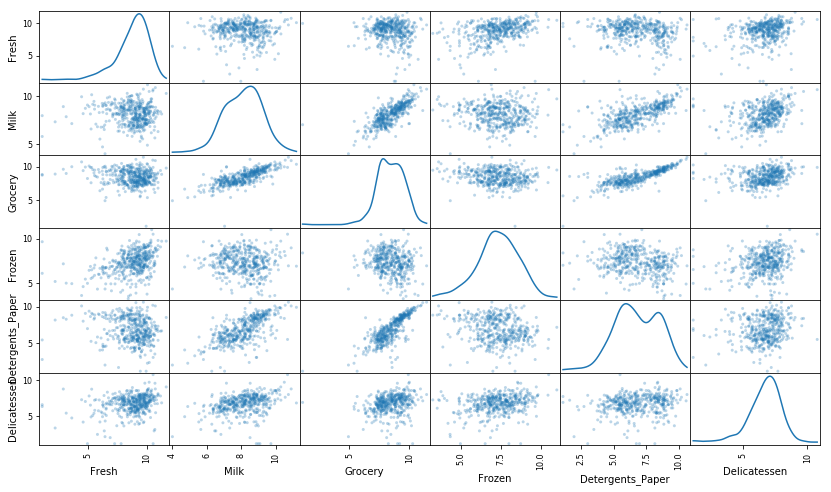

In [12]:
# TODO: Escalone os dados utilizando o algoritmo natural
log_data = data.apply(np.log)

# TODO: Escalone a amostra de dados utilizando o algoritmo natural
log_samples = samples.apply(np.log)

# Produza uma matriz de dispersão para cada par de atributos novos-transformados
pd.plotting.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observação
Após aplicar o algoritmo natural para o escalonamento dos dados, a distribuição para cada atributo deve parecer mais normalizado. Para muitos pares de atributos, você vai precisar identificar anteriormente como sendo correlacionados, observe aqui se essa correlação ainda está presente (e se está mais forte ou mais fraca que antes).

Execute o código abaixo para ver como a amostra de dados mudou depois do algoritmo natural ter sido aplicado a ela.

In [13]:
# Mostre a amostra dados log-transformada
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,10.663966,5.655992,6.154858,7.235619,3.465736,3.091042
1,10.489662,10.555005,10.995377,8.087640,10.192456,7.609367
2,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669


### Implementação: Detecção de valores atípicos (_Outlier_)
Identificar dados discrepantes é extremamente importante no passo de pré-processamento de dados de qualquer análise. A presença de discrepantes podem enviesar resultados que levam em consideração os pontos de dados. Há muitas "regras básicas" que constituem um discrepante em um conjunto de dados. Aqui usaremos [o Método Turco para identificar valores atípicos](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): Um *passo do discrepante* é calculado 1,5 vezes a variação interquartil (IQR). Um ponto de dados com um atributo que está além de um passo de um discrepante do IQR para aquele atributo, ele é considerado anormal.

No bloco de código abaixo, você vai precisar implementar o seguinte:
 - Atribuir o valor do 25º percentil do atributo dado para o `Q1`. Utilizar `np.percentile` para isso.
 - Atribuir o valor do 75º percentil do atributo dado para o `Q3`. Novamente, utilizar `np.percentile`.
 - Atribuir o cálculo de um passo do discrepante do atributo dado para o `step`.
 - Remover opcionalmentos os pontos de dados do conjunto de dados ao adicionar índices à lista de `outliers`.

**NOTA:** Se você escolheu remover qualquer discrepante, tenha certeza que a amostra de dados não contém nenhum desses pontos!  
 Uma vez que você executou essa implementação, o conjunto de dado será armazenado na variável `good_data`!

In [14]:
# Para cada atributo encontre os pontos de dados com máximos valores altos e baixos
for feature in log_data.keys():
    
    # TODO: Calcule Q1 (25º percentil dos dados) para o atributo dado
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calcule Q3 (75º percentil dos dados) para o atributo dado
    Q3 = np.percentile(log_data[feature],75)
    
    # TODO: Utilize a amplitude interquartil para calcular o passo do discrepante (1,5 vezes a variação interquartil)
    step = 1.5 * ( Q3 - Q1 )
    
    # Mostre os discrepantes
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    
    
# OPCIONAL: Selecione os índices dos pontos de dados que você deseja remover
outliers  = [95,338,96,66,218,357,109,142,187,233]

# Remova os valores atí, caso nenhum tenha sido especificado
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


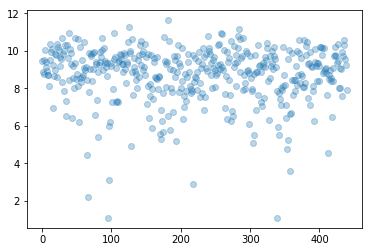

In [15]:
_ = log_data['Fresh'].plot(marker='o', linewidth=0, alpha=0.3)

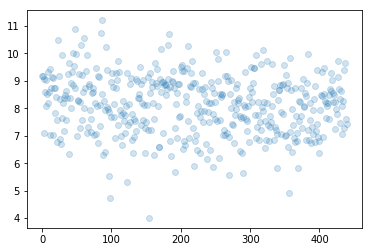

In [16]:
_ = log_data['Milk'].plot(marker='o', linewidth=0, alpha=0.2)

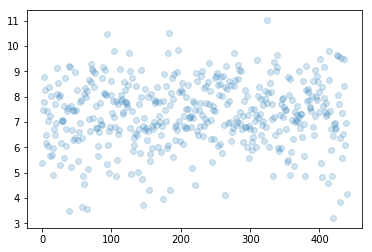

In [17]:
_ = log_data['Frozen'].plot(marker='o', linewidth=0, alpha=0.2)

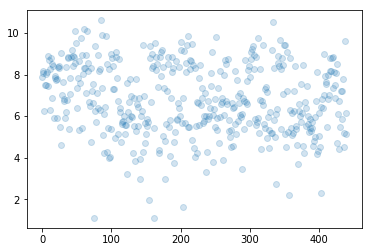

In [18]:
_  =log_data['Detergents_Paper'].plot(marker='o', linewidth=0, alpha=0.2)

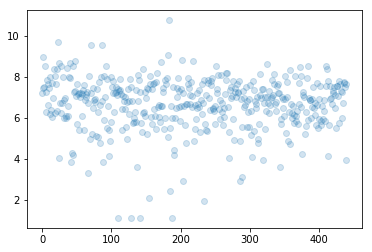

In [19]:
_ = log_data['Delicatessen'].plot(marker='o', linewidth=0, alpha=0.2)

### Questão 4
- Há alguns pontos de dado considerados discrepantes de mais de um atributo baseado na definição acima?
- Esses pontos de dados deveriam ser removidos do conjunto?
- Se qualquer ponto de dados foi adicionado na lista `outliers` para ser removido, explique por quê.

**Resposta:** 

*-*
|Índices dos outliers|
|------|
|95|
|338|
|96|
|66|
|218|
|357|
|109|
|142|
|187|
|233|
*-*

Anteriormente havíamos gerado **boxplot**. O boxplot é uma representação gráfico da análise de quartil. Os pontos pretos acima ou abaixo dos whiskers são os outliers seguindo a regra de 1.5IQR, assim vemos, por exemplo, que no boxplot existe uma grande quantidade de outliers para a feature **Fresh**, assim como na tabela gerada para mesma feature.

A representação gráfica dos dados mostra uma que os dados estão condensada, exceto para **Fresh** e **Delicatessen**, onde vemos uma maior dispersão dos valores em relação aos pontos de maior densidade.

Usando a regra do interquartile com a análise gráfica, vou assumir que os pontos com valores **menores** que 4 para **Fresh** e 2 **Delicatessen** são **outliers** e portanto serão retirados da base.

**obs**: O ponto 128 não será retirado, pois faz parte da sample

## Transformação de Atributo
Nesta seção, você irá utilizar a análise de componentes principais (PCA) para elaborar conclusões sobre a estrutura subjacente de dados de clientes do atacado. Dado que ao utilizar a PCA em conjunto de dados calcula as dimensões que melhor maximizam a variância, nós iremos encontrar quais combinações de componentes de atributos melhor descrevem os consumidores.

### Implementação: PCA

Agora que os dados foram escalonados em uma distribuição normal e qualquer discrepante necessário foi removido, podemos aplicar a PCA na `good_data` para descobrir qual dimensão dos dados melhor maximizam a variância dos atributos envolvidos. Além de descobrir essas dimensões, a PCA também irá reportar a *razão da variância explicada* de cada dimensão – quanta variância dentro dos dados é explicada pela dimensão sozinha. Note que o componente (dimensão) da PCA pode ser considerado como um novo "feature" do espaço, entretanto, ele é uma composição do atributo original presente nos dados.

No bloco de código abaixo, você vai precisar implementar o seguinte:
 - Importar o `sklearn.decomposition.PCA` e atribuir os resultados de ajuste da PCA em seis dimensões com o `good_data` para o `pca`.
 - Aplicar a transformação da PCA na amostra de log-data `log_samples` utilizando `pca.transform`, e atribuir os resultados para o `pca_samples`.

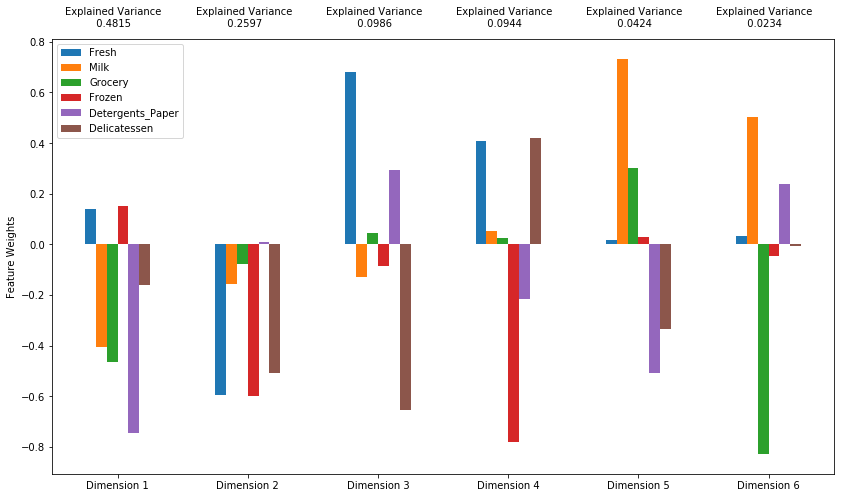

In [20]:
from sklearn.decomposition import PCA

# TODO: Aplique a PCA ao ajustar os bons dados com o mesmo número de dimensões como atributos
pca = PCA().fit(good_data)

# TODO: Transforme a amostra de data-log utilizando o ajuste da PCA acima
pca_samples = pca.transform(log_samples)

# Gere o plot dos resultados da PCA
pca_results = vs.pca_results(good_data, pca)

### Questão 5
- Quanta variância nos dados é explicada **no total** pelo primeiro e segundo componente principal?
- Quanta variância nos dados é explicada pelos quatro primeiros componentes principais?
- Utilizando a visualização fornecida acima, discuta quais das quatro primeiras dimensões que melhor representam em termos de despesas dos clientes. Explique qual das quatro representa melhor em termos de consumo dos clientes.

**Dica:** Uma melhora positiva dentro de uma dimensão específica corresponde a uma *melhora* do atributos de *pesos-positivos* e uma *piora* dos atributos de *pesos-negativos*. A razão de melhora ou piora é baseada nos pesos de atributos individuais.

**Resposta:** Temos que os _dois primeiros_ componentes representam **0.7412** da variância dos dados, enquanto os _4 primeiros_ corrrespondem **0.9341**.

Os gastos dos clientes apresentam forte correlação com os **componentes 3 e 4** e estão associados com o crescimento das despesas dos clientes com determinados itens que possuem peso positivo.

O consumo dos clientes é melhor representado pelos componentes **1 e 2**, onde estes componentes crescem com o menor consumo dos clientes para maioria dos itens oferecidos.

### Observação
Execute o código abaixo para ver como a amostra de log transformado mudou depois de receber a transformação da PCA aplicada a ele em seis dimensões. Observe o valor numérico para as quatro primeiras dimensões para os pontos da amostra. Considere se isso for consistente com sua interpretação inicial dos pontos da amostra.

In [21]:
# Exiba a amostra de log-data depois de aplicada a tranformação da PCA
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,5.3479,1.3308,2.8773,-0.1766,0.4480,-0.0652
1,-4.5029,-2.4429,1.2819,-0.1081,0.5899,-0.0826
2,-3.3048,2.3815,-4.9069,-1.7338,-0.6999,-0.3881


### Implementação: Redução da Dimensionalidade
Ao utilizar um componente principal de análise, um dos objetivos principais é reduzir a dimensionalidade dos dados – na realidade, reduzindo a complexidade do problema. Redução de dimensionalidade tem um custo: Poucas dimensões utilizadas implicam em menor variância total dos dados que estão sendo explicados. Por causo disso, a *taxa de variância explicada cumulativa* é extremamente importante para saber como várias dimensões são necessárias para o problema. Além disso, se uma quantidade significativa de variância é explicada por apenas duas ou três dimensões, os dados reduzidos podem ser visualizados depois.

No bloco de código abaixo, você vai precisar implementar o seguinte:
 - Atribuir os resultados de ajuste da PCA em duas dimensões com o `good_data` para o `pca`.
 - Atribuir a tranformação da PCA do `good_data` utilizando `pca.transform`, e atribuir os resultados para `reduced_data`.
 - Aplicar a transformação da PCA da amostra do log-data `log_samples` utilizando `pca.transform`, e atribuindo os resultados ao `pca_samples`.

In [22]:
# TODO: Aplique o PCA ao ajusta os bons dados com apenas duas dimensões
pca = PCA(n_components=2).fit(good_data)

# TODO: Transforme os bons dados utilizando o ajuste do PCA acima
reduced_data = pca.transform(good_data)

# TODO: Transforme a amostre de log-data utilizando o ajuste de PCA acima
pca_samples = pca.transform(log_data)

# Crie o DataFrame para os dados reduzidos
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observação
Execute o código abaixo para ver como a amostra de dados do log-transformado mudou depois de receber a transformação do PCA aplicada a ele em apenas duas dimensões. Observe como os valores das duas primeiras dimensões permanessem constantes quando comparados com a transformação do PCA em seis dimensões.

In [23]:
# Exiba a amostra de log-data depois de aplicada a transformação da PCA em duas dimensões
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-1.7655,0.3619
1,-1.8428,-0.7134
2,-1.9506,-1.5594
3,1.0644,-1.4907
4,-0.8995,-2.3196
5,-1.1078,-0.1317
6,-1.1389,0.5433
7,-1.6216,-0.8027
8,-0.8553,0.8572
9,-2.9243,-0.5147


## Visualizando um Biplot
Um biplot é um gráfico de dispersão onde cada ponto é representado por sua pontuação junto das componentes principais. Os eixos são as componentes principais (nesse caso, `Dimension 1` e `Dimenson 2`). Além disso, o biplot mostra a projeção dos atributos originais junto das componentes. Um biplot pode nos ajudar a interpretar a redução da dimensionalidade dos dados e descobrir relacionamentos entre as componentes principais e os atributos originais.

Execute a célula abaixo para produzir um biplot com os dados de dimensionalidade reduzida.

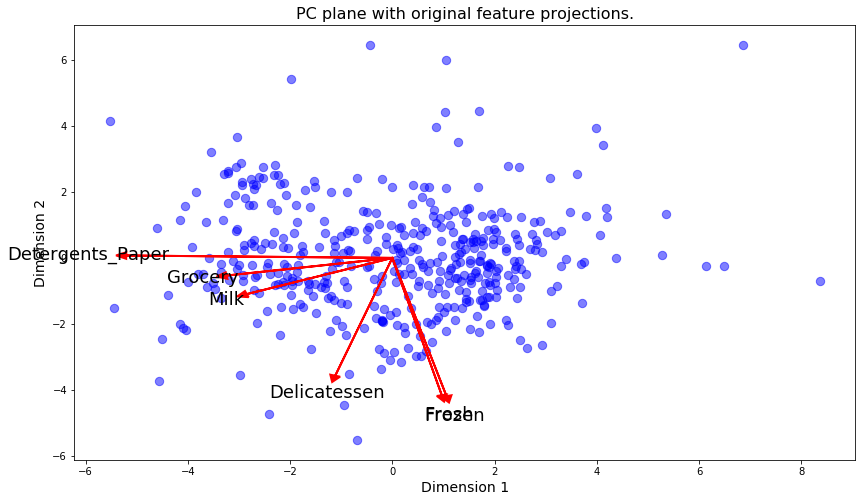

In [24]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

## Clustering

Nesta seção, você irá escolher utilizar entre o algoritmo de clustering K-Means ou o algoritmo de clustering do Modelo de Mistura Gaussiano para identificar as várias segmentações de clientes escondidos nos dados. Então você irá recuperar pontos de dados específicos do cluster para entender seus significados ao transformá-los de volta em suas dimensões e escalas originais. 

### Questão 6
- Quais são as vantagens de utilizar o algoritmo de clustering K-Means?
- Quais são as vantagens de utilizar o algoritmo de clustering do Modelo de Mistura Gaussiano?
- Dadas as suas observações até agora sobre os dados de clientes da distribuidora, qual dos dois algoritmos você irá utilizar e por quê.

**Dica: **Pense na diferença entre os clusters mais próximos ou mais isolados.

**Resposta:**

**K-Means**: é um algoritmo simples que pode ser utilizado em vários casos com boa performance para amostras grandes, número definido de clusters, gera clusters de tamanho semelhante e não alongados.

**GMM**: consegue gerar clusters com formato _flexível_ e soft-clustering (amostra é parte de vários clusters)

**Algoritmo escolhido**: Analisando o **biplot** podemos supor que **K-Means** não seria um bom candidato devido aos exemplos abaixo, onde vemos **K-Means** não consegue gerar formas _flexíveis_ de clusters. No **biplot** não é simples definir quantos clusters existem e qual deveria ser seu formato, mas o esférico gerado pelo K-Means parece não ser o melhor.

[Fonte](http://scikit-learn.org/stable/modules/clustering.html#k-means)

![Demonstration of k-means assumptions](http://scikit-learn.org/stable/_images/sphx_glr_plot_kmeans_assumptions_001.png)

### Implementação: Criando Clusters
Dependendo do problema, o número de clusters que você espera que estejam nos dados podem já ser conhecidos. Quando um número de clusters não é conhecido *a priori*, não há garantia que um dado número de clusters melhor segmenta os dados, já que não é claro quais estruturas existem nos dados – se existem. Entretanto, podemos quantificar a "eficiência" de um clustering ao calcular o *coeficiente de silhueta* de cada ponto de dados. O [coeficiente de silhueta](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) para um ponto de dado mede quão similar ele é do seu cluster atribuído, de -1 (não similar) a 1 (similar). Calcular a *média* do coeficiente de silhueta fornece um método de pontuação simples de um dado clustering.

No bloco de código abaixo, você vai precisar implementar o seguinte:
 - Ajustar um algoritmo de clustering para o `reduced_data` e atribui-lo ao `clusterer`.
 - Prever o cluster para cada ponto de dado no `reduced_data` utilizando o `clusterer.predict` e atribuindo eles ao `preds`.
 - Encontrar os centros do cluster utilizando o atributo respectivo do algoritmo e atribuindo eles ao `centers`.
 - Prever o cluster para cada amostra de pontos de dado no `pca_samples` e atribuindo eles ao `sample_preds`.
 - Importar sklearn.metrics.silhouette_score e calcular o coeficiente de silhueta do `reduced_data` contra o do `preds`.
   - Atribuir o coeficiente de silhueta para o `score` e imprimir o resultado.

In [25]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

score_sil = []
for i in range(2,20):
    # TODO: Aplique o algoritmo de clustering de sua escolha aos dados reduzidos 
    clusterer = GaussianMixture(n_components = i).fit(reduced_data)
    
    # TODO: Preveja o cluster para cada ponto de dado
    preds = clusterer.predict(reduced_data)

    # TODO: Ache os centros do cluster
    centers = clusterer.means_

    # TODO: Preveja o cluster para cada amostra de pontos de dado transformados
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calcule a média do coeficiente de silhueta para o número de clusters escolhidos
    score = silhouette_score(reduced_data,preds)

    score_sil.append('Numero de clusters {} - score {:.4f}'.format(i,score))

In [26]:
# TODO: Aplique o algoritmo de clustering de sua escolha aos dados reduzidos 
clusterer = GaussianMixture(n_components = 2).fit(reduced_data)

# TODO: Preveja o cluster para cada ponto de dado
preds = clusterer.predict(reduced_data)

# TODO: Ache os centros do cluster
centers = clusterer.means_

# TODO: Preveja o cluster para cada amostra de pontos de dado transformados
sample_preds = clusterer.predict(pca_samples)

# TODO: Calcule a média do coeficiente de silhueta para o número de clusters escolhidos
score = silhouette_score(reduced_data,preds)

In [27]:
score_sil

['Numero de clusters 2 - score 0.4221',
 'Numero de clusters 3 - score 0.1798',
 'Numero de clusters 4 - score 0.2954',
 'Numero de clusters 5 - score 0.2782',
 'Numero de clusters 6 - score 0.3136',
 'Numero de clusters 7 - score 0.3404',
 'Numero de clusters 8 - score 0.3092',
 'Numero de clusters 9 - score 0.2354',
 'Numero de clusters 10 - score 0.2980',
 'Numero de clusters 11 - score 0.3198',
 'Numero de clusters 12 - score 0.2778',
 'Numero de clusters 13 - score 0.2922',
 'Numero de clusters 14 - score 0.2916',
 'Numero de clusters 15 - score 0.2939',
 'Numero de clusters 16 - score 0.2882',
 'Numero de clusters 17 - score 0.3214',
 'Numero de clusters 18 - score 0.3255',
 'Numero de clusters 19 - score 0.3400']

### Questão 7
- Reporte o coeficiente de silhueta para vários números de cluster que você tentou.
- Dentre eles, qual a quantidade de clusters que tem a melhor pontuação de silhueta?




**Resposta:**

Para diferentes números de clusters temos os resultados acima. O **score** do `coeficiente de silhueta` cai com o aumento dos clusters.

O **melhor** resultado encontrado ocorre para o número de clusters igual a `2`.

### Visualização de Cluster
Uma vez que você escolheu o número ótimo de clusters para seu algoritmo de clustering utilizando o método de pontuação acima, agora você pode visualizar os resultados ao executar o bloco de código abaixo. Note que, para propósitos de experimentação, é de bom tom que você ajuste o número de clusters para o seu algoritmo de cluster para ver várias visualizações. A visualização final fornecida deve, entretanto, corresponder com o número ótimo de clusters. 

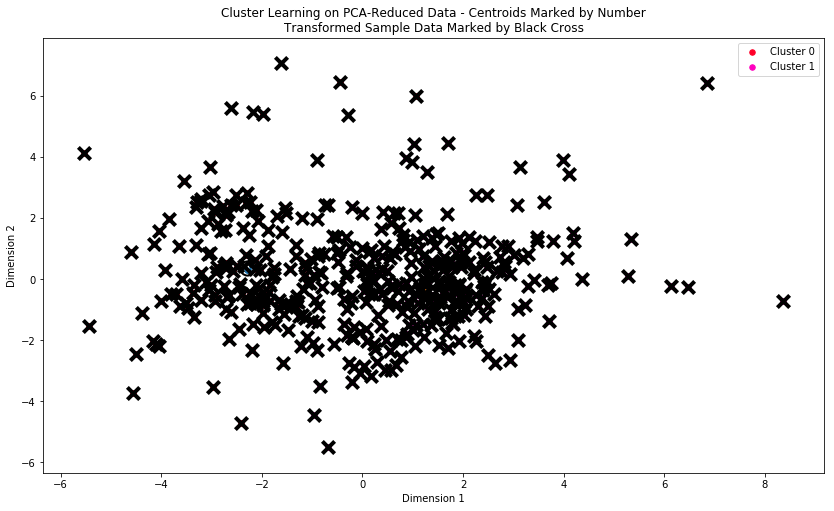

In [28]:
# Mostre os resultados do clustering da implementação
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Visualizar o resultado do cluster gerado e os centros

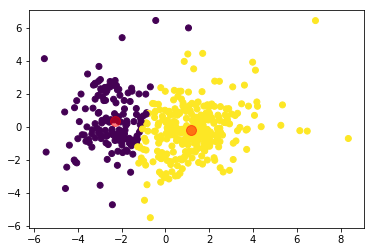

In [29]:
_ = plt.scatter(x = reduced_data['Dimension 1'], y = reduced_data['Dimension 2'], c=preds)
_ = plt.scatter(x = centers[0][0], y = centers[0][1], s = 100, c = 'red', alpha = 0.5)
_ = plt.scatter(x = centers[1][0], y = centers[1][1], s = 100, c = 'red', alpha = 0.5)

### Implementação: Recuperação de Dados
Cada cluster apresentado na visualização acima tem um ponto central. Esses centros (ou médias) não são especificamente pontos de dados não específicos dos dados, em vez disso, são *as médias* de todos os pontos estimados em seus respectivos clusters. Para o problema de criar segmentações de clientes, o ponto central do cluster corresponde *a média dos clientes daquele segmento*. Já que os dados foram atualmente reduzidos em dimensões e escalas por um algoritmo, nós podemos recuperar a despesa representativa do cliente desses pontos de dados ao aplicar transformações inversas.

No bloco de código abaixo, você vai precisar implementar o seguinte:
 - Aplicar a transformação inversa para o `centers` utilizando o `pca.inverse_transform`, e atribuir novos centros para o `log_centers`.
 - Aplicar a função inversa do `np.log` para o `log_centers` utilizando `np.exp`, e atribuir os verdadeiros centros para o `true_centers`.


In [30]:
# TODO: Transforme inversamento os centros
log_centers = pca.inverse_transform(centers)

# TODO: Exponencie os centros
true_centers = np.exp(log_centers)

# Mostre os verdadeiros centros
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,3953.0,8071.0,12829.0,844.0,4932.0,992.0
Segment 1,9021.0,2137.0,2662.0,2021.0,366.0,763.0


### Questão 8
- Considere o gasto total de compra de cada categoria de produto para os pontos de dados representativos acima e reporte a descrição estatística do conjunto de dados no começo do projeto. Qual conjunto de estabelecimentos cada segmentação de clientes representa?

**Dica:** Um cliente que é atribuído ao `'Cluster X'` deve se identificar melhor com os estabelecimentos representados pelo conjunto de atributos do `'Segment X'`. Pense no que cada segmento representa em termos do ponto de atributo escolhido.

**Resposta:**

In [31]:
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


A segmentação mostra que os **centros** agrupam estabelecimentos com grande demanda de **Fresh** e **Frozen** em um segmento e os com grande de demanda **Grocery**, **Milk** e **Detergents_Paper** em outro.

||Fresh|	Milk	|Grocery|	Frozen|	Detergents_Paper|	Delicatessen|
|-----|---------|-------|---------|-----------------|---------------|       
|Segment 0|3953.0|**8071.0**|**12829.0**|844.0|**4932.0**|**992.0**|
|**mean**|12000.297727|**5796.265909**|**7951.277273**|3071.931818|**2881.493182**|**1524.870455**|
|**25%**|	3127.750000|	1533.000000|	2153.000000|	742.250000|	256.750000|	408.250000|
|**50%**|	8504.000000|	3627.000000|	4755.500000|	1526.000000|	816.500000|	965.500000|
|**75%**|	16933.750000|	**7190.250000**|	**10655.750000**|	3554.250000|	**3922.000000**|	**1820.250000**|

Vemos acima que o **segmento 0** apresenta valores *acima da média e do 3º quartil* para os itens **Grocery**, **Detergents_Paper** e **Delicatessen**.

||Fresh|	Milk	|Grocery|	Frozen|	Detergents_Paper|	Delicatessen|
|-----|---------|-------|---------|-----------------|---------------|       
|Segment 1|	**9021.0**|	2137.0|	2662.0|	**2021.0**|	366.0|	763.0|
|**mean**|**12000.297727**|5796.265909|7951.277273|**3071.931818**|2881.493182|1524.870455|
|**25%**|	3127.750000|	1533.000000|	2153.000000|	742.250000|	256.750000|	408.250000|
|**50%**|	**8504.000000**|	3627.000000|	4755.500000|	**1526.000000**|	816.500000|	965.500000|
|**75%**|	16933.750000|	7190.250000|	10655.750000|	3554.250000|	3922.000000|	1820.250000|

O **segmento 0** apresenta valores muito acima da média para **Fresh**. Para **Frozen** seu valor é muito superior ao do **segmento 1**. Seus centro está acima da mediana para **Fresh** e **Frozen**.S



O resultado está de acordo com os estabelecimentos supostos no início do projeto na **questão 1** onde foram supostos _3 tipos de clientes_ identificados, onde seperamos basicamente em dois grupos _restaurantes(segmento 0)_ e _mercados(segmento 1)_.

### Questão 9
- Para cada amostra de ponto, qual segmento de cliente da **Questão 8** é melhor representado?
- As previsões para cada amostra de ponto são consistentes com isso?

Execute o bloco de códigos abaixo para saber a previsão de segmento para cada amostra de ponto.

In [32]:
# Mostre as previsões
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 0
Sample point 3 predicted to be in Cluster 1
Sample point 4 predicted to be in Cluster 1
Sample point 5 predicted to be in Cluster 0
Sample point 6 predicted to be in Cluster 0
Sample point 7 predicted to be in Cluster 0
Sample point 8 predicted to be in Cluster 0
Sample point 9 predicted to be in Cluster 0
Sample point 10 predicted to be in Cluster 0
Sample point 11 predicted to be in Cluster 1
Sample point 12 predicted to be in Cluster 0
Sample point 13 predicted to be in Cluster 0
Sample point 14 predicted to be in Cluster 0
Sample point 15 predicted to be in Cluster 1
Sample point 16 predicted to be in Cluster 0
Sample point 17 predicted to be in Cluster 1
Sample point 18 predicted to be in Cluster 0
Sample point 19 predicted to be in Cluster 0
Sample point 20 predicted to be in Cluster 1
Sample point 21 predicted to be in Cluster 1
Sample point 22 pred

In [33]:
def f_auxplot(graph,x,y):
    graph.scatter(x = good_data[x], y = good_data[y], c = preds)
    graph.set_xlabel(x)
    graph.set_ylabel(y)

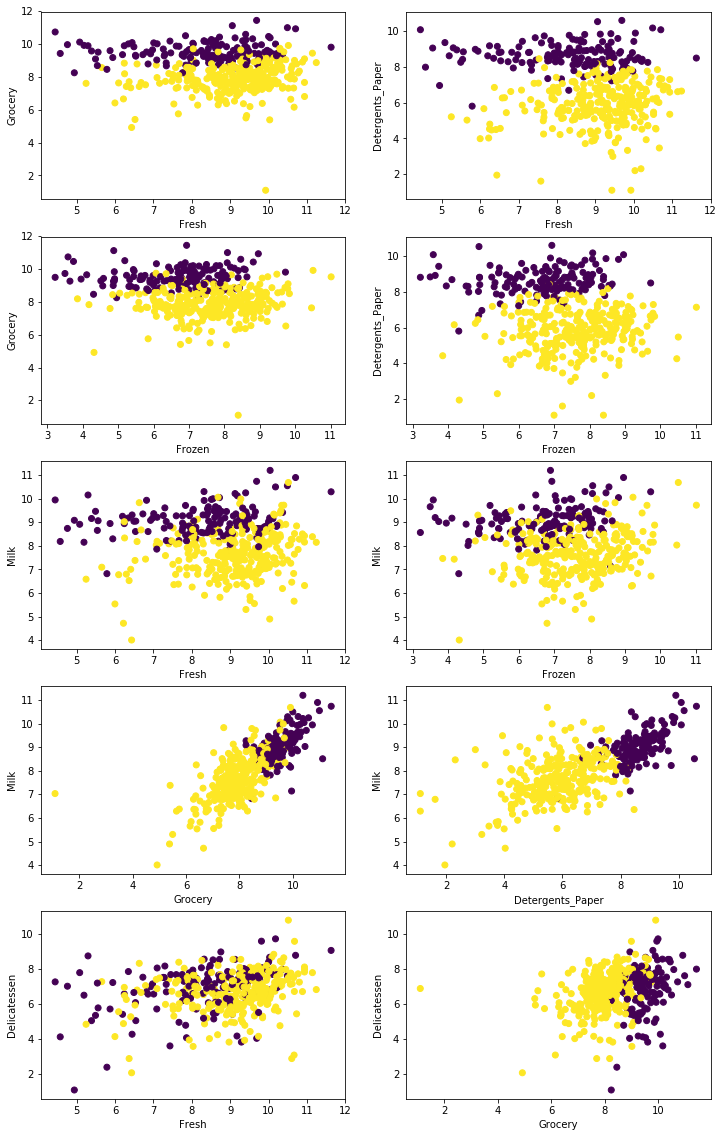

In [35]:

fig, ax = plt.subplots(nrows=5, ncols=2)

fig.set_figheight(20)
fig.set_figwidth(12)

# Fresh x Grocery
f_auxplot(ax[0][0], 'Fresh', 'Grocery')

# Fresh x Detergents_Paper
f_auxplot(ax[0][1], 'Fresh', 'Detergents_Paper')

# Frozen x Grocery
f_auxplot(ax[1][0], 'Frozen', 'Grocery')

# Frozen x Detergents_Paper
f_auxplot(ax[1][1], 'Frozen', 'Detergents_Paper')

# Frozen x Milk
f_auxplot(ax[2][0], 'Fresh', 'Milk')

# Frozen x Milk
f_auxplot(ax[2][1], 'Frozen', 'Milk')

# Grocery x Milk
f_auxplot(ax[3][0], 'Grocery', 'Milk')

# Grocery x Milk
f_auxplot(ax[3][1], 'Detergents_Paper', 'Milk')

# Fresh x Delicatessen
f_auxplot(ax[4][0], 'Fresh', 'Delicatessen')

# Grocery x Delicatessen
f_auxplot(ax[4][1], 'Grocery', 'Delicatessen')

plt.show()

**Resposta:**

Analisando os gráficos acima, vemos que os segmentos tem boa separação quando olhamos features como **Fresh** e **Frozen** de um lado e **Grocery** e **Detergents_paper** do outro. O que está de acordo com o que analisamos na **Questão 8**.

As previsões são consistentes com os dois segmentos que analisamos anteriormente.

## Conclusão

Nesta seção final, você irá investigar maneiras de fazer uso dos dados que estão em clusters. Primeiro você vai considerar quais são os diferentes grupos de clientes, a **segmentação de clientes**, que pode ser afetada diferentemente por um esquema de entrega específico. Depois, você vai considerar como dar um rótulo para cada cliente (qual *segmento* aquele cliente pertence), podendo fornecer atributos adicionais sobre os dados do cliente. Por último, você vai comparar a **segmentação de clientes** com uma variável escondida nos dados, para ver se o cluster identificou certos tipos de relação.

### Questão 10
Empresas sempre irão executar os [testes A/B](https://en.wikipedia.org/wiki/A/B_testing) ao fazer pequenas mudanças em seus produtos ou serviços para determinar se ao fazer aquela mudança, ela afetará seus clientes de maneira positiva ou negativa. O distribuidor de atacado está considerando mudar seu serviço de entrega de atuais 5 dias por semana para 3 dias na semana. Mas o distribuidor apenas fará essa mudança no sistema de entrega para os clientes que reagirem positivamente.
- Como o distribuidor de atacado pode utilizar a segmentação de clientes para determinar quais clientes, se há algum, que serão alcançados positivamente à mudança no serviço de entrega?

**Dica:** Podemos supor que as mudanças afetam todos os clientes igualmente? Como podemos determinar quais grupos de clientes são os mais afetados?

**Resposta:**
A segmentação de clientes nos mostra que um grupo de clientes se concentra em produtos do tipo **Fresh**(perecíveis). As características desse tipo de produto podem demandar mudanças na estrutura do estabelecimento para lidar com maior intervalo entre as entregas.
Os clientes do **segmento 1** tem maior chance de lidar positivamente com essa mudanças, por não estarem focados em produtos perecíveis.

Utilizando um **teste A/B** o distribuidor pode utilizar a `segmentação` criada para analisar para cada cluster a reação dos clientes que estão no cluster. O comportamento de cada cluster poderá indicar se os clientes estão reagindo positivamente as mudanças propostas.

### Questão 11
A estrutura adicional é derivada dos dados não rotulados originalmente quando utilizado as técnicas de clustering. Dado que cada cliente tem um **segmento de cliente** que melhor se identifica (dependendo do algoritmo de clustering aplicado), podemos considerar os *segmentos de cliente* como um **atributo construído (engineered)** para os dados. Assumindo que o distribuidor de atacado adquiriu recentemente dez novos clientes e cada um deles forneceu estimativas dos gastos anuais para cada categoria de produto. Sabendo dessas estimativas, o distribuidor de atacado quer classificar cada novo cliente em uma **segmentação de clientes** para determinar o serviço de entrega mais apropriado.  
- Como o distribuidor de atacado pode rotular os novos clientes utilizando apenas a estimativa de despesas com produtos e os dados de **segmentação de clientes**.

**Dica:** Um aprendiz supervisionado pode ser utilizado para treinar os clientes originais. Qual seria a variável alvo?

**Resposta:**

Como já rotulamos os dados, podemos utilizar técnicas de _aprendizado supervisionado_ para aprender pelas **despesas**(train) dos clientes em qual **segmento**(target) ele deve estar.

O modelo treinado pode ser utilizado sobre as **estimativas de despesas** dos novos clientes para fornecer como resposta, em qual **segmento** o novo cliente deve estar.

### Visualizando Distribuições Subjacentes

No começo deste projeto, foi discutido que os atributos `'Channel'` e `'Region'` seriam excluídos do conjunto de dados, então as categorias de produtos do cliente seriam enfatizadas na análise. Ao reintroduzir o atributo `'Channel'` ao conjunto de dados, uma estrutura interessante surge quando consideramos a mesma redução de dimensionalidade da PCA aplicada anteriormente no conjunto de dados original.

Execute o código abaixo para qual ponto de dados é rotulado como`'HoReCa'` (Hotel/Restaurante/Café) ou o espaço reduzido `'Retail'`. Al´´em disso, você vai encontrar as amostras de pontos circuladas no corpo, que identificará seu rótulo.

In [ ]:
# Mostre os resultados do clustering baseado nos dados do 'Channel'
vs.channel_results(reduced_data, outliers, pca_samples)

In [ ]:
_ = plt.scatter(x = reduced_data['Dimension 1'], y = reduced_data['Dimension 2'], c=preds)
_ = plt.scatter(x = centers[0][0], y = centers[0][1], s = 100, c = 'red', alpha = 0.3)
_ = plt.scatter(x = centers[1][0], y = centers[1][1], s = 100, c = 'red', alpha = 0.3)

### Questão 12
- Quão bom é o algoritmo de clustering e o números de clusters que você escolheu comparado a essa distribuição subjacente de clientes de Hotel/Restaurante/Café a um cliente Varejista?
- Há segmentos de clientes que podem ser classificados puramente como 'Varejistas' ou 'Hotéis/Restaurantes/Cafés' nessa distribuição?
- Você consideraria essas classificações como consistentes comparada a sua definição de segmentação de clientes anterior?*

**Resposta:**

 - O algoritmo GMM identificou corretamente existência de 2 clusters e conseguiu gerar uma separação satisfatória, embora a região de transiente entre os clusters não seja bem definida.
 
 - Quando nos afastamos da região central, vemos `Hotéis/Restaurantes/Cafés` ficando a direita do gráfico, enquanto `Varejista` ficam a esquerda. O padrão é o mesmo encontrado na clusterização criada por GMM. A área de transiente é bem definida por **GMM**, mas como mostrado no gráfico que contém **channel** na realidade a separação não é tão clara.
 
 - A classificação é consistente com a segmentação discutida nos exemplos anteriores.

> **Nota**: Uma vez que você completou todas as implementações de código e respondeu todas as questões acima com êxito, você pode finalizar seu trabalho exportando um iPython Notebook como um documento HTML. Você pode fazer isso utilizando o menu acima e navegando até  
**File -> Download as -> HTML (.html)**. Inclua o documento finalizado junto com esse Notebook para o seu envio.